# Mission Rapid Analysis 🌎 (40 points)


### 1.1 Overview ✉️

Welcome to your mission! In this notebook, you will download a dataset containing restaurants' information in the state of California, US. The dataset will then be transformed, processed and prepared in a required format. This clean dataset will then be used to answer some analytical questions and create a few data visualizations in Python.

This is a template notebook that has some code already filled-in to help you on your way. There are also cells that require you to fill in the python code to solve specific problems. There are sections of the notebook that contain a points tally for code written. 

**Each section of this notebook is largely independent, so if you get stuck on a problem you can always move on to the next one.**

### 1.2 Tools & Technologies 🪛

- This exercise will be carried out using the [Python](https://www.python.org/) programming language and will rely hevily on the [Pandas](https://pandas.pydata.org/) library for data manipulation.
- You may use any of [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/) or [Plotly](https://plotly.com/python/) packages for data visualization.
- We will be using [Jupyter notebooks](https://jupyter.org/) to run Python code in order to view and interact better with our data and visualizations.
- You are free to use [Google Colab](https://colab.research.google.com/) which provides an easy-to-use Jupyter interface.
- When not in Colab, it is recommended to run this Jupyter Notebook within an [Anaconda](https://continuum.io/) environment
- You can use any other Python packages that you deem fit for this project.

> ⚠ **Ensure that your Python version is 3.9 or higher**

![](https://upload.wikimedia.org/wikipedia/commons/1/1b/Blue_Python_3.9_Shield_Badge.svg)

**Language**

![Python](https://img.shields.io/badge/python-3670A0?style=for-the-badge&logo=python&logoColor=ffdd54)

**Environments & Packages**

![Anaconda](https://img.shields.io/badge/Anaconda-%2344A833.svg?style=for-the-badge&logo=anaconda&logoColor=white)
![Jupyter Notebook](https://img.shields.io/badge/jupyter-%23FA0F00.svg?style=for-the-badge&logo=jupyter&logoColor=white)
![Pandas](https://img.shields.io/badge/pandas-%23150458.svg?style=for-the-badge&logo=pandas&logoColor=white)
![Matplotlib](https://img.shields.io/badge/Matplotlib-%23ffffff.svg?style=for-the-badge&logo=Matplotlib&logoColor=black)
![Plotly](https://img.shields.io/badge/Plotly-%233F4F75.svg?style=for-the-badge&logo=plotly&logoColor=white)


### 2.1 Read California Restaurants 🔍 (3 points)

In this section, we will load the dataset from this link :

https://rapidopso365-my.sharepoint.com/:u:/g/personal/pushkar_ambatkar_rapidops_com/EZneJNDj5f1CrIY-ZjMDxakBJOYJjI2VAQqSZgBYdkCzjQ?e=2tpkQM


- Ensure that pandas and plotly are installed (possibly via pip or poetry)
- The dataset is about 300 MB in size and time-to-download depends on internet speed and availability
- Download the dataset using Python into this notebook and load it into a pandas dataframe


In [18]:
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import plotly.express as px
import numpy as np

CELL_HEIGHT: int = 50

# Initialize helpers to ignore pandas warnings and resize columns and cells
pd.set_option("chained_assignment", None)
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 500)
pd.set_option('display.max_colwidth', CELL_HEIGHT)

In [19]:
%%time
# import requests

# # specify the URL of the dataset you want to download
# url = "https://rapidopso365-my.sharepoint.com/:u:/g/personal/pushkar_ambatkar_rapidops_com/EZneJNDj5f1CrIY-ZjMDxakBJOYJjI2VAQqSZgBYdkCzjQ?e=2tpkQM"

# # use the requests library to download the file
# response = requests.get(url)


# with open('california_restaurants.json', 'wb') as f:
#     f.write(response.content)
#     print('Dataset downloaded successfully.')

df = pd.read_json('california_restaurants.json')

CPU times: user 8.41 s, sys: 698 ms, total: 9.1 s
Wall time: 9.07 s


Create a restaurant ID column to uniquely index each restaurant


In [20]:
df["restaurant_id"] = range(1, len(df) + 1)
df.head(3)

,country,subregion,city,brand_name,categories,latitude,longitude,area,address,menu,description,public_transit,cross_street,restaurant_website,phone_number,primary_cuisine,dining_style,executive_chef_name,parking_info,dress_code,entertainment,operating_hours,price_range_id,price_range,payment_options,maximum_days_advance_for_reservation,rating,rating_count,rating_by_feature,rating_distribution,review_count,review_topics,awards,experiences,tags,editorial_lists,checklist,safety_precautions,order_online_link,facebook,menu_url,popular_dishes,daily_reservation_count,restaurant_id
0,United States,California,Los Angeles,Luv2Eat Thai Bistro,[Thai],34.097510,-118.335921,Hollywood,"6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...","[{'name': 'Main Menu', 'sections': [{'name': '...","Luv2Eat Thai Bistro is located in Los Angeles,...",None,None,http://www.luv2eatthai.com/,(323) 498-5835,Thai,Casual Dining,None,Street Parking,Casual Dress,None,Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...,2,$30 and under,"[AMEX, Discover, MasterCard, Visa]",90,4.6,136,"{'food': 4.7, 'noise': 2.0, 'value': 4.6, 'ser...","[2, 3, 4, 23, 104]",18,"[Spicy, Casual, Neighborhood Gem]",[],[],"[Delivery, Gluten-free Options, Late Night, No...",[],"{'bar': False, 'counter': False, 'gifting': No...","{'cleanMenus': None, 'limitedSeating': None, '...",None,http://www.facebook.com/luv2eatthaibistro/,http://sappclub.com/restaurant.aspx?r=205,[],NaN,1
1,United States,California,Sherman Oaks,Jerry's Famous Deli,[American],34.154596,-118.448700,Sherman Oaks,None,"[{'name': 'Sample Menu', 'sections': [{'name':...",<p>Feast on delicious grub at Jerry's Famous D...,None,None,http://www.jerrysfamousdeli.com/,(818) 905-5774,American,Casual Dining,None,None,Business Casual,None,None,2,$30 and under,[],90,0.0,0,"{'food': 0.0, 'noise': 0.0, 'value': 0.0, 'ser...","[0, 0, 0, 0, 0]",0,[],[],[],[],[],"{'bar': None, 'counter': None, 'gifting': None...","{'cleanMenus': None, 'limitedSeating': None, '...",None,None,None,[],NaN,2
2,United States,California,Pasadena,Terrace Sushi,[Spanish],34.145800,-118.142900,Pasadena,"443 E Colorado Blvd, , CA, Pasadena, 91101, Un...","[{'name': 'Main Menu', 'sections': [{'name': '...",<p>Terrace Sushi serves Japanese cuisines to i...,None,None,None,(626) 584-0503,Spanish,Casual Dining,None,None,Business Casual,None,None,2,$30 and under,[],90,0.0,0,"{'food': 0.0, 'noise': 0.0, 'value': 0.0, 'ser...","[0, 0, 0, 0, 0]",0,[],[],[],[],[],"{'bar': None, 'counter': None, 'gifting': None...","{'cleanMenus': None, 'limitedSeating': None, '...",None,None,None,[],NaN,3


In [21]:
df.columns

Index(['country', 'subregion', 'city', 'brand_name', 'categories', 'latitude',
       'longitude', 'area', 'address', 'menu', 'description', 'public_transit',
       'cross_street', 'restaurant_website', 'phone_number', 'primary_cuisine',
       'dining_style', 'executive_chef_name', 'parking_info', 'dress_code',
       'entertainment', 'operating_hours', 'price_range_id', 'price_range',
       'payment_options', 'maximum_days_advance_for_reservation', 'rating',
       'rating_count', 'rating_by_feature', 'rating_distribution',
       'review_count', 'review_topics', 'awards', 'experiences', 'tags',
       'editorial_lists', 'checklist', 'safety_precautions',
       'order_online_link', 'facebook', 'menu_url', 'popular_dishes',
       'daily_reservation_count', 'restaurant_id'],
      dtype='object')

In [22]:
df.shape

(18316, 44)

### 2.2 Basic Operations 🔧 (4 points)

#### 2.2.1 Restaurants by City 🌆 (1 point)

For each city in california, find

1. the number of restaurants in that city,
2. mean `rating` of all restaurants in the city,
3. mean `price_range_id` per city,
4. mean `maximum_days_advance_for_reservation` per city

sort by number of restaurants.

The resulting dataframe's top 5 rows would look as follows:

| city          | restaurant_count | avg_rating | avg_price_range_id | avg_reservation_advance |
| :------------ | ---------------: | ---------: | -----------------: | ----------------------: |
| San Francisco |             1645 |    2.59343 |             2.3617 |                 90.3453 |
| Los Angeles   |             1604 |    2.31995 |            2.29052 |                  86.692 |
| San Diego     |             1034 |    2.65493 |            2.28723 |                 94.5783 |
| San Jose      |              372 |    1.54597 |            2.16398 |                 88.3011 |
| Sacramento    |              329 |    1.68663 |            2.26748 |                 95.0274 |


In [23]:
#Grouped Cities and applied Aggregate Function to obtain the above desired dataframe.
city_grp = df.groupby("city").aggregate({
    "brand_name":"count",
    "rating":"mean",
    "price_range_id":"mean",
    "maximum_days_advance_for_reservation":"mean"
})

#Sorting values based on brand_name in descending order.
df_city = city_grp.sort_values(by="brand_name",ascending=False)

#Renaming the dataframe and printed the top 5 usinng head function as per the above mentioned details.
df_city.rename(columns={
    "brand_name":"restaurant_count",
    "rating":"avg_rating",
    "price_range_id":"avg_price_range_id",
    "maximum_days_advance_for_reservation":"avg_reservation_advance"
}).head()


,restaurant_count,avg_rating,avg_price_range_id,avg_reservation_advance
city,,,,
San Francisco,1645,2.593435,2.361702,90.345289
Los Angeles,1604,2.319950,2.290524,86.692020
San Diego,1034,2.654932,2.287234,94.578337
San Jose,372,1.545968,2.163978,88.301075
Sacramento,329,1.686626,2.267477,95.027356


#### 2.2.2 Restaurants by Brand 🍔 (1 point)

For each brand (`brand_name`) in california, find

1. the number of restaurants that belong to that brand,
2. mean `price_range_id` of the brand across its restaurants

sort by number of restaurants.

The resulting dataframe's top 5 rows would look as follows:

| brand_name               | restaurant_count | avg_price_range_id |
| :----------------------- | ---------------: | -----------------: |
| Denny's                  |               73 |                  2 |
| Ihop                     |               37 |                  2 |
| Buffalo Wild Wings       |               32 |                  2 |
| Black Bear Diner         |               28 |                  2 |
| Coco's Bakery Restaurant |               24 |                  2 |


In [24]:
.#Grouped Brands and applied Aggregate Function to obtain the above desired dataframe.
#Renaming the dataframe as per the above mentioned details.
#Sorting values based on resturant_count in descending order.
#Printed the top 5 usinng head function.

df_brand = df.groupby("brand_name").aggregate({
     "brand_name":"count",
     "price_range_id":"mean"
 }).rename(columns={
     "brand_name":"restaurant_count",
     "price_range_id":"avg_price_range_id"
 }).sort_values(by="restaurant_count",ascending=False)
    
df_brand.head()

,restaurant_count,avg_price_range_id
brand_name,,
Denny's,73,2.0
Ihop,37,2.0
Buffalo Wild Wings,32,2.0
Black Bear Diner,28,2.0
Coco's Bakery Restaurant,24,2.0


#### 2.2.3 Visualize Brands 📊 (2 points)

Create a bar chart of top 5 brands in california by average number of reviews where each brand has at least 5 restaurants


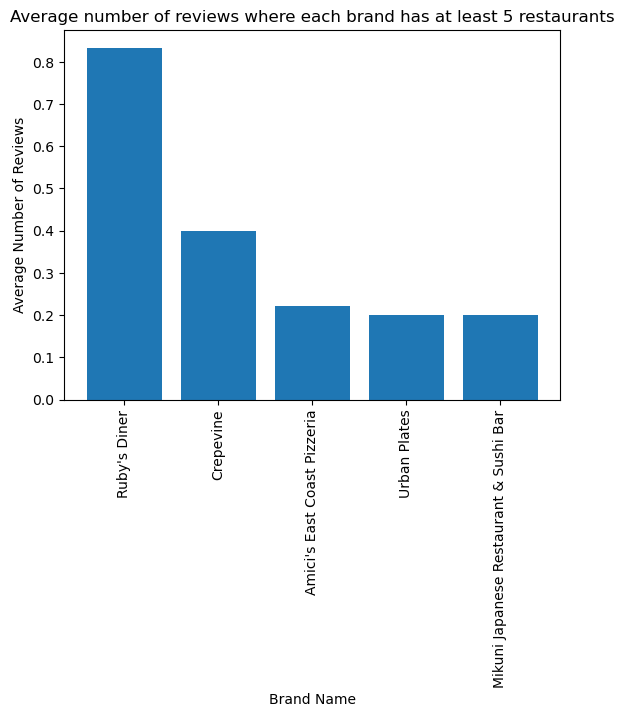

In [25]:
#Grouped Brands and applied Aggregate Function to obtain the above desired dataframe.
#Renaming the dataframe as per the above mentioned details.


brand_grp = df.groupby("brand_name").aggregate({
    "brand_name":"count",
    "review_count":"mean",
    
}).rename(columns={
    "brand_name":"number_of_restaurants",
    "review_count":"avg_number_of_reviews"
})

#Sorting values based on avg_number_of_reviews in descending order.
brand_grp.sort_values(by="avg_number_of_reviews",ascending=False,inplace=True)

#Obtained the brand_grp having atleat 5 restuarants. 
brand_grp=brand_grp[brand_grp["number_of_restaurants"]>=5]

#Plotted the bar graph of brand_name to average_number_of_reviews for top 5 brands.
plt.bar(brand_grp.index[:5],brand_grp["avg_number_of_reviews"][:5])
plt.xlabel('Brand Name')
plt.ylabel('Average Number of Reviews')
plt.title('Average number of reviews where each brand has at least 5 restaurants')
plt.xticks(rotation='90');

### 2.3 Transform Columns 🚚 (15 Points)

<img src="https://media.giphy.com/media/2f41Z7bhKGvbG/giphy.gif" height="250px" width="250px" alt="harry potter">

#### 2.3.1 Safety Precautions 🦺 (2 points)

Transform the entire safety precautions column into a new column based on the following rule:

Convert from dictionary to list. Only include in the list, those keys in the dictionary which are true.
For ex, for safety precautions of the type:

```python
{
    'cleanMenus': True,
    'limitedSeating': False,
    'sealedUtensils': None,
    'prohibitSickStaff': True,
    'requireDinerMasks': True,
    'staffIsVaccinated': None,
    'proofOfVaccinationRequired': False,
    'sanitizerProvidedForCustomers': None
}
```

It should turn into a list of the form:

```python
["Clean Menus", "Prohibit Sick Staff", "Require Diner Masks"]
```


In [26]:
#Made a copy of original dataframe to view the difference in final results
df_extended = df.copy()
df_extended["safety_precautions"]

0        {'cleanMenus': None, 'limitedSeating': None, '...
1        {'cleanMenus': None, 'limitedSeating': None, '...
2        {'cleanMenus': None, 'limitedSeating': None, '...
3        {'cleanMenus': None, 'limitedSeating': None, '...
4        {'cleanMenus': True, 'limitedSeating': False, ...
                               ...                        
18311    {'cleanMenus': None, 'limitedSeating': None, '...
18312    {'cleanMenus': None, 'limitedSeating': None, '...
18313    {'cleanMenus': None, 'limitedSeating': None, '...
18314    {'cleanMenus': None, 'limitedSeating': None, '...
18315    {'cleanMenus': None, 'limitedSeating': None, '...
Name: safety_precautions, Length: 18316, dtype: object

In [27]:
#Imported RegularExpression Module.
import re

#Function To Covert the Camel Case Flat Case.
def sentence_case(string):
    if string != '':
        result = re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1', string))
        return result[:1].upper() + result[1:]
    return

#Defined List l1 which contains all the keys of safety_precautions are True.
l1=[]

#Loop to obtain the True values from the safety_precautions which is a list of dictionaries.
for list_of_dictionaries in df_extended["safety_precautions"]:
    l2=[]
    for key,value in list_of_dictionaries.items():
        if value:
            l2.append(key)
            
    l1.append(l2)

#Defined List l3 which contains the Flat case converted from camel case using sentence_case function. 
l3=[]

#Loop to obtain the Flat Case values of all the values of  list l1. 
for item_list in l1:
    l4=[]
    for item_sublist in item_list:
        l4.append(sentence_case(item_sublist))
    l3.append(l4)

In [28]:
#Original DataFrame.
df["safety_precautions"][87]

{'cleanMenus': True,
 'limitedSeating': True,
 'sealedUtensils': None,
 'prohibitSickStaff': True,
 'requireDinerMasks': None,
 'sanitizedSurfaces': True,
 'staffIsVaccinated': None,
 'commonAreaCleaning': True,
 'contactlessPayment': True,
 'commonAreaDistancing': True,
 'requireWaitstaffMasks': True,
 'contactTracingCollected': None,
 'dinerTempChecksRequired': None,
 'staffTempChecksRequired': True,
 'proofOfVaccinationOutdoor': None,
 'tableLayoutWithExtraSpace': True,
 'proofOfVaccinationRequired': False,
 'sanitizerProvidedForCustomers': None}

In [29]:
#Modified DataFrame.
df_extended["New_Safety_Precautions"]=l3
df_extended["New_Safety_Precautions"][87]

['Clean  Menus',
 'Limited  Seating',
 'Prohibit  Sick  Staff',
 'Sanitized  Surfaces',
 'Common  Area  Cleaning',
 'Contactless  Payment',
 'Common  Area  Distancing',
 'Require  Waitstaff  Masks',
 'Staff  Temp  Checks  Required',
 'Table  Layout  With  Extra  Space']

#### 2.3.2 Clean up HTML text 🥜 (2 points)

Find columns containing text / strings that have html text and remove those HTML texts

ex:

```html
<p>
  Feast on delicious grub at Jerry's Famous Deli.<br />
  Its retro-style casual setting features comfortable booth seating.
</p>
```

to:

```
Feast on delicious grub at Jerry's Famous Deli. Its retro-style casual setting features comfortable booth seating.
```


In [30]:
#Checking for Description Column.
df["description"][0]

'Luv2Eat Thai Bistro is located in Los Angeles, California and serves up authentic Thai cuisine for locals and guests alike. You can discover the art of real Thai cooking by enjoying the food made by classically trained chefs who love the kitchen. Luv2Eat Thai Bistro incorporates old family recipes into the menu, while also adding modern touches where appropriate.<br /><br />The menu at Luv2Eat Thai Bistro is extensive, with many favorites. For an appetizer, try the fried meat balls, fish cake, chicken satay, eggplant green curry or fried tofu. Those who enjoy noodle dishes will likely enjoy the drunken spicy noodle, pad thai, meatball noodles or drumstick chicken noodle.<br />'

In [31]:
#Checking for Entertainment Column.
df["entertainment"].value_counts()

<br />                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         6
Live entertainment & dancing nightly at the piano bar.                                                                                                                                                                                                                                                                                                                                                                                 

In [32]:
#Imported RegularExpression Module.
import re

#Function to clean the text from html_tags using Regular Expression re.sub() method.
def clean_html_tags(text):
    if text == None:
        return
    pattern ="<[^<]+?>"
    clean_text =re.sub(pattern,"",text)
    return clean_text

#Applying the Functions to clean the Two Columns (Description and Entertainment).
df["description"]= df["description"].apply(clean_html_tags)
df["entertainment"]=df["entertainment"].apply(clean_html_tags)

#### 2.3.3 Imputing 📈 (3 points)

Fill up missing values for rating, rating count and review count by imputing based on the following columns in order:

1. `brand_name`
2. `area`
3. `city`

This means that if `rating` is missing for a restaurant (null / 0), but that restaurant is part of a brand where
other restaurants of the same brand have ratings, then a median rating is taken. If brands are complete, then missing values are filled using
area where the restaurant is located (median rating) and finally filled using the city's rating


In [33]:
#Just trying to obtain the desired output. 
df.groupby("brand_name")["rating"].median()[df.loc[0,"brand_name"]]

4.6

In [34]:
#Creating a copy of original dataframe to view the difference in the results.
df2= df.copy()

In [35]:
#Created Groups of brand_name, area, city and accessed the rating property.
brand_rating =df2.groupby("brand_name")["rating"]
area_rating = df2.groupby("area")["rating"]
city_rating = df2.groupby("city")["rating"]

In [36]:
"""
Looping through the dataframe to remove the rating based to following criterion:

1)Fill the none value of rating column with median rating value of its corresponding brand.
2)If the median rating value of its corresponding brand is 0 , fill it with median rating value of its corresponding area.
3)If the median rating value of its corresponding area is 0 , fill it with median rating value of its corresponding city.

"""

for i in range(len(df2[:100])):
    if df2.loc[i,"rating"]==None or df2.loc[i,"rating"]==0:
        if brand_rating.median()[df2.loc[i,"brand_name"]] != 0:
            df2.loc[i,"rating"] = brand_rating.median()[df2.loc[i,"brand_name"]]
            
        elif df2.groupby("area")["rating"].median()[df2.loc[i,"area"]] != 0:
                df2.loc[i,"rating"] = area_rating.median()[df2.loc[i,"area"]]
                
        else:
             df2.loc[i,"rating"] = city_rating.median()[df2.loc[i,"city"]]
            
            
            

In [37]:
df2["rating"][:10]

0    4.60
1    3.45
2    3.90
3    3.90
4    4.70
5    4.00
6    0.00
7    4.30
8    4.20
9    3.90
Name: rating, dtype: float64

In [38]:
df["rating"][:10]

0    4.6
1    0.0
2    0.0
3    0.0
4    4.7
5    0.0
6    0.0
7    4.3
8    4.2
9    3.9
Name: rating, dtype: float64

In [39]:
#Created Groups of brand_name, area, city and accessed the rating_count property.
brand_rating_count =df2.groupby("brand_name")["rating_count"]
area_rating_count = df2.groupby("area")["rating_count"]
city_rating_count = df2.groupby("city")["rating_count"]

In [40]:
"""
Looping through the dataframe to remove the rating_count based to following criterion:

1)Fill the none value of rating_count column with median rating_count value of its corresponding brand.
2)If the median rating_count value of its corresponding brand is 0 , fill it with median rating_count value of its corresponding area.
3)If the median rating_count value of its corresponding area is 0 , fill it with median rating_count value of its corresponding city.

"""
for i in range(len(df2[:100])):
    if df2.loc[i,"rating_count"]==None or df2.loc[i,"rating_count"]==0:
        if brand_rating_count.median()[df2.loc[i,"brand_name"]] != 0:
            df2.loc[i,"rating_count"] = brand_rating_count.median()[df2.loc[i,"brand_name"]]
            
        elif area_rating_count.median()[df2.loc[i,"area"]] != 0:
                df2.loc[i,"rating_count"] = area_rating_count.median()[df2.loc[i,"area"]]
                
        else:
             df2.loc[i,"rating_count"] = city_rating_count.median()[df2.loc[i,"city"]]

In [41]:
df2["rating_count"][:10]

0    136.0
1      4.0
2     18.0
3     18.5
4     83.0
5     22.0
6      0.0
7     96.0
8     32.0
9     13.0
Name: rating_count, dtype: float64

In [43]:
df["rating_count"][:10]

0    136
1      0
2      0
3      0
4     83
5      0
6      0
7     96
8     32
9     13
Name: rating_count, dtype: int64

In [44]:
#Created Groups of brand_name, area, city and accessed the review_count property.
brand_review_count =df2.groupby("brand_name")["review_count"]
area_review_count = df2.groupby("area")["review_count"]
city_review_count = df2.groupby("city")["review_count"]

In [45]:
"""
Looping through the dataframe to remove the review_count based to following criterion:

1)Fill the none value of review_count column with median review_count value of its corresponding brand.
2)If the median review_count value of its corresponding brand is 0 , fill it with median review_count value of its corresponding area.
3)If the median review_count value of its corresponding area is 0 , fill it with median review_count value of its corresponding city.

"""
for i in range(len(df2[:100])):
    if df2.loc[i,"rating"]==None or df2.loc[i,"review_count"]==0:
        if brand_review_count.median()[df2.loc[i,"brand_name"]] != 0:
            df2.loc[i,"review_count"] = brand_review_count.median()[df2.loc[i,"brand_name"]]
            
        elif area_review_count.median()[df2.loc[i,"area"]] != 0:
                df2.loc[i,"review_count"] = area_review_count.median()[df2.loc[i,"area"]]
                
        else:
             df2.loc[i,"review_count"] = city_review_count.median()[df2.loc[i,"city"]]

In [46]:
df2["review_count"][:10]

0     18.0
1      2.0
2      7.5
3      7.5
4    692.0
5      9.0
6      0.0
7     26.0
8     12.0
9      5.0
Name: review_count, dtype: float64

In [47]:
df["review_count"][:10]

0     18
1      0
2      0
3      0
4    692
5      0
6      0
7     26
8     12
9      5
Name: review_count, dtype: int64

#### 2.3.4 Analytical Transformations (8 points)

Choose any one sub-section only to answer. The choice is yours

<img src="https://media.giphy.com/media/SCt3Miv6ugvSg/giphy.gif" height="250px" width="250px" alt="the matrix">


##### 2.3.4a Operating Hours 🕰️

Create an operating hours [bitmap](https://en.wikipedia.org/wiki/Bit_array) column from the operating hours text column for all restaurants. The bitmap would be a matrix of size 24 x 7 where a 1 or 0 on each cell indicates whether the restaurant is operating on a specific day at a specific hour

Example: For operating hours text of the form:

```tex
Lunch
Daily 11:00 am–3:30 pm
Dinner
Daily 4:30 pm–11:30 pm
```

Create a bitmap of the following form:

```json
{
    "Monday" : [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],
    "Tuesday" : [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],
    .
    .
    .
    "Sunday" : [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],

}
```


##### 2.3.4b On my radar 🗺️

For the following restaurant:

- brand_name `Calzone's Pizza Cucina`
- coordinates `37.799068, -122.408226`.

Answer these questions:

- How many restaurants exist within a 100 meter radius of this restaurant?
- What is the most frequent cuisine (`category`) occurence in this 100m radius across the restaurants that exist in that range?

In [48]:
#Imported modules used in finding distance between two different coordinates. 
import haversine as hs
from haversine import Unit
from statistics import mode

#Created a list of tuples of coordinates i.e [(latitude,longitude),..]
coordinates =list(zip(df["latitude"],df["longitude"]))

#Source Name and Its Coordinates.
source_brand_name = "Calzone's Pizza Cucina"
source_coordinate = (37.799068, -122.408226)

#List to store distance of each resturant from the source.
distances =[]

#Some variables to keep track of number of restaurants within 100 meter radius and most frequent cuisine.
global brand_count
brand_count=0
global cuisines

#List to store cuisines of each resturant which is within the 100 meter radius from the source.
cuisines=[]

#Loop to find the distances..
for item in coordinates:
    dist = hs.haversine(source_coordinate,item,unit=Unit.METERS)
    distances.append(dist)

#Function to count the number of restaurants within 100 meter radius and store their cuisines.
def filt(dists,brand_count):
    for i in range(0,len(dists)):
        if (dists[i]<=100) & (dists[i]>0):
            brand_count=brand_count+1
            cuisines.append(df.loc[i,"categories"])
    return brand_count


#Function called to obtain the required results.
brand_count=filt(distances,brand_count)
freq_cuisine = mode(list(np.concatenate(cuisines)))

print(f"How many restaurants exist within a 100 meter radius of this restaurant?\n {brand_count}")
print(f"What is the most frequent cuisine (`category`) occurence in this 100m radius across the restaurants that exist in that range?\n {freq_cuisine}")

How many restaurants exist within a 100 meter radius of this restaurant?
 20
What is the most frequent cuisine (`category`) occurence in this 100m radius across the restaurants that exist in that range?
 Italian


---

### 2.4 Menu-Level Table 🧾 (8 points)

<img src="https://media.giphy.com/media/qpLuA97QGOsnK/giphy.gif" height="250px" width="250px" alt="ratatouille">

**Create a menu-level table by parsing out menu items from the `menu` column per restaurant.**

Every restaurant has a `menu` column that contains deeply nested JSON data on the restaurant's menu. The hierarchy is as follows: 

* One restaurant can have multiple menus (morning menu, evening menu, etc.)
    * Each menu can have a description and provider
* Each restaurant menu can have multiple sections (such as Appetizers, Desserts, etc.)
    * Each section has a description
* Each section can have multiple menu items (such as Latte, Apple Pie, Carrot Halwa, etc.)
    * Each menu item has a price, currency and description

You need to parse out the menu data from the JSON in the `menu` column for each restaurant and have a restaurants x menu table as shown below. 

| restaurant_id | menu_name | menu_description | menu_provider | section_name | section_description | item_name          | item_description                                                                                                      | item_price | item_price_currency |
| ------------: | :-------- | :--------------- | ------------: | :----------- | :------------------ | :----------------- | :-------------------------------------------------------------------------------------------------------------------- | ---------: | :------------------ |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Egg Rolls          | Deep fried mixed veggie egg rolls served with sweet & sour sauce                                                      |          8 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Fried Tofu         | (Contains Peanut) Deep fried tofu, served with sweet & sour sauce and crushed peanut                                  |          8 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Fried Meat Balls   | Deep fried fish, pork, beef balls or mixed served with sweet & sour sauce. Meat: Beef $1, Fish, Mixed Meat ball, Pork |        8.5 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Pork Jerky         | Deep fried marinated pork served with special jaew sauce                                                              |        8.5 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Thai Isaan Sausage | (Contains Peanut) Thai Style sausage served with fresh vegetables and peanuts                                         |          9 | USD                 |


In [49]:
#Imported module to display a datframe.
from IPython.display import display

#Function to display the menu table as mentioned above.
def display_menu_table(df,index):
    demo_menu=df[index]
    restaurant_id=[]
    list_of_names =[]
    list_of_desc =[]
    list_of_provider_names=[]
    list_of_section_names=[]
    list_of_section_desc=[]
    list_of_item_names=[]
    list_of_item_desc=[]
    list_of_item_price=[]
    list_of_item_currency=[]
    
    #Looping into each item in nested lists and dictionares to obtain the required results.
    for data in demo_menu:
        sections = data["sections"]
        for data2 in sections:        
            items = data2["items"]
            for data3 in items:
                prices=data3["price"]
                restaurant_id.append(index)
                list_of_names.append(data["name"])
                list_of_desc.append(data["description"])
                list_of_provider_names.append(data["provider_name"])
                list_of_section_names.append(data2["name"])
                list_of_section_desc.append(data2["description"])
                list_of_item_names.append(data3["name"])
                list_of_item_desc.append(data3["description"])
                for key,value in prices.items():
                    if key == "value":
                        list_of_item_price.append(value)
                    else:
                        list_of_item_currency.append(value)
    
    #Created data dictionay for constructing dataframe.
    dt={
        "reaturant_id":restaurant_id,
        "menu_name":list_of_names,
        "menu_description":list_of_desc,
        "menu_provider":list_of_provider_names,
        "section_name":list_of_section_names,
        "section_description":list_of_section_desc,
        "item_name":list_of_item_names,
        "item_description":list_of_item_desc,
        "item_price":list_of_item_price,
        "item_price_currency":list_of_item_currency  
    }
    
    #Constructing a dataframe using pandas and displaying it.
    menu_df = pd.DataFrame(data=dt)
    display(menu_df)

In [50]:
display_menu_table(df["menu"],1)

,reaturant_id,menu_name,menu_description,menu_provider,section_name,section_description,item_name,item_description,item_price,item_price_currency
0,1,Sample Menu,,None,Popular Items,,Potato Knish,With gravy.,7.50,USD
1,1,Sample Menu,,None,Popular Items,,Dinner Salad,,6.75,USD
2,1,Sample Menu,,None,Popular Items,,Southwestern Wrap,"Chicken fajita salad corn, lettuce, avocado an...",13.00,USD
3,1,Sample Menu,,None,Popular Items,,Corned Beef Sandwich - L.a.,,12.85,USD
4,1,Sample Menu,,None,Popular Items,,Corned Beef Sandwich - N.y.,,17.25,USD
5,1,Sample Menu,,None,Popular Items,,Korean Bulgogi Sandwich,Lettuce and onions on French roll.,16.45,USD


### 3.1 Analytical Questions ⚗️ (10 points)

**Answer ONLY ONE of the Questions using the Data, i.e, choose between `3.1.1`, `3.1.2` or `3.1.3`**

<img src="https://media.giphy.com/media/3o7TKVSE5isogWqnwk/giphy.gif" height="250px" width="250px" alt="sherlock holmes">

> Note that the analytical questions may sometimes require converting categorical type columns that are lists or strings into numeric columns. For ex. "Casual Dining", "Fine Dining"..etc. would require you to generate a categorical encoding of 1,2..etc. For columns that contain lists like `categories`, which contain cuisine tags, a one-hot or multi-hot encoding technique may be required based on the situation. A numeric categorical encoding is required for these string or list based columns since pandas cannot (usually) automatically generate correlations or clusters based on text-based categories


#### 3.1.1 Take me out for dinner 🕯️

Which areas according to you have the best restaurants in California and why? You can define best based on whatever criteria you wish as long as it involves measuring more than a single column. For ex. You cannot merely claim that the restaurant with the highest rating is the best restaurant.

### 🍴 BEST Area to eat out goes to "West Hollywood"

Their are various reason why West Hollywood is the best place to eat out,\
Because,
1. We are already filter out those restaurants less reviews which less people have visited it.
2. The Award is not only based on rating and reviews counts of the area but also the categories of food you can have
3. One of the best reasons is the area is not pricey insplit of the categories of food it is providing
4. Area have decent amount of reatuarants so one can easily hop on another place if not liked 

In [92]:
#Created a copy of dataframe for answering the above analytical question : Which are is best ??
df_anal= df.copy()


Index(['country', 'subregion', 'city', 'brand_name', 'categories', 'latitude',
       'longitude', 'area', 'address', 'menu', 'description', 'public_transit',
       'cross_street', 'restaurant_website', 'phone_number', 'primary_cuisine',
       'dining_style', 'executive_chef_name', 'parking_info', 'dress_code',
       'entertainment', 'operating_hours', 'price_range_id', 'price_range',
       'payment_options', 'maximum_days_advance_for_reservation', 'rating',
       'rating_count', 'rating_by_feature', 'rating_distribution',
       'review_count', 'review_topics', 'awards', 'experiences', 'tags',
       'editorial_lists', 'checklist', 'safety_precautions',
       'order_online_link', 'facebook', 'menu_url', 'popular_dishes',
       'daily_reservation_count', 'restaurant_id'],
      dtype='object')

Cells below this markdown are just to understand the dataframe and its columns

In [162]:
df_anal.columns

Index(['country', 'subregion', 'city', 'brand_name', 'categories', 'latitude',
       'longitude', 'area', 'address', 'menu', 'description', 'public_transit',
       'cross_street', 'restaurant_website', 'phone_number', 'primary_cuisine',
       'dining_style', 'executive_chef_name', 'parking_info', 'dress_code',
       'entertainment', 'operating_hours', 'price_range_id', 'price_range',
       'payment_options', 'maximum_days_advance_for_reservation', 'rating',
       'rating_count', 'rating_by_feature', 'rating_distribution',
       'review_count', 'review_topics', 'awards', 'experiences', 'tags',
       'editorial_lists', 'checklist', 'safety_precautions',
       'order_online_link', 'facebook', 'menu_url', 'popular_dishes',
       'daily_reservation_count', 'restaurant_id', 'number_of_categories'],
      dtype='object')

In [93]:
df_anal["awards"][10]

[{'name': 'Outdoor Dining', 'location': 'Palm Springs / Palm Desert Cities'},
 {'name': 'Contemporary American',
  'location': 'Palm Springs / Palm Desert Cities'},
 {'name': 'Outdoor Dining', 'location': 'Palm Springs / Palm Desert'},
 {'name': 'Contemporary American', 'location': 'Palm Springs / Palm Desert'}]

In [94]:
df_anal["daily_reservation_count"].unique()

array([ nan,   1.,  14.,  40.,  15., 110.,  18.,  13.,  20.,  12.,  27.,
        33.,   4.,   3.,   5.,   2.,  21., 147.,  17.,  22.,  46.,  16.,
        62.,   6.,  11.,  68.,  24.,   8.,  10.,   9.,  54.,  38.,  35.,
         7.,  32.,  29.,  25.,  37.,  36.,  19.,  72., 130.,  34.,  83.,
       140.,  82.,  30.,  45.,  65., 122.,  41., 161.,  78.,  58.,  86.,
        23., 104.,  77., 113.,  56.,  39.,  49.,  50.,  75.,  26.,  28.,
        95.,  59.,  94., 134.,  43.,  47., 189.,  31., 238.,  42.,  73.,
        67.,  92.,  57.,  51., 108., 300., 101., 111., 166.,  53., 174.,
       145.,  70.,  99.,  89., 146.,  63., 103.,  91.,  93.,  80., 124.,
        55.,  81.,  44.,  87., 107.,  48.,  84.,  98.,  64.,  69.,  61.,
        74., 139., 138., 250.,  66., 123.,  52.,  60.,  71., 218., 100.,
       109., 127., 389.,  79., 132., 115., 114., 190., 128., 200.,  90.,
       162., 164.,  76., 135., 222., 182., 105., 131., 176., 199., 180.,
       173., 256., 112., 167., 168., 125., 158., 24

In [95]:
df_anal["brand_name"].unique()

array(['Luv2Eat Thai Bistro', "Jerry's Famous Deli", 'Terrace Sushi', ...,
       'Thirsty Bear', 'Bua Thai Kitchen', 'The Original Chulada Grill'],
      dtype=object)

In [96]:
df_anal["public_transit"].unique()

array([None,
       'The free Emery-go-Round that operates from the MaCarthur BART Station will drop you off at 59th Street and Hollis.<br />This puts you at a distance of one and 1/2 blocks from the restaurant.  You only need to walk one block up 59th, towards the Oakland Hills, to Doyle and make a right.  The Townhouse will be on your left under the big Redwood tree.',
       'MUNI bus #1 stops on Sacramento and Mason Streets when heading West, or on Clay and Mason Streets when heading East. <br />Cable cars meet atop Nob Hill. The California Line stops on California and Mason; The Powell Line stops on California and Powell.',
       ..., '16th and Mission BART <br />MUNI 33,22,55,22OWL',
       'Just 4 blocks from 16th Street Mission BART Station',
       'New Montgomery Station MUNI & BART'], dtype=object)

In [97]:
cat_features = ["dining_style","price_range"]
decision_based_features=["categories","primary_cuisine","dining_style","price_range","maximum_days_advance_for_reservation","rating","daily_reservation_count"]

Creating a Number_of_Categories column using categories column.

In [98]:
df_anal["categories"]

0                                          [Thai]
1                                      [American]
2                                       [Spanish]
3                         [Contemporary American]
4                                       [Italian]
                           ...                   
18311                                  [American]
18312                                   [Chinese]
18313    [Spanish, Tapas / Small Plates, Brewery]
18314                 [Thai, Asian, Comfort Food]
18315                                   [Mexican]
Name: categories, Length: 18316, dtype: object

In [99]:
df_anal["categories"][9]

['Seafood', 'American', 'Shellfish']

In [100]:
dictionary ={}
label=0
for item in df_anal["categories"][:]:
    for subitem in item:
        if not subitem in dictionary:
            dictionary[subitem]=label
            label=label+1


In [101]:
dictionary

{'Thai': 0,
 'American': 1,
 'Spanish': 2,
 'Contemporary American': 3,
 'Italian': 4,
 'Japanese': 5,
 'Mexican': 6,
 'Brazilian': 7,
 'Café': 8,
 'Bar / Lounge / Bottle Service': 9,
 'Seafood': 10,
 'Shellfish': 11,
 'Continental': 12,
 'Californian': 13,
 'Pizzeria': 14,
 'Sushi': 15,
 'Wine Bar': 16,
 'Oyster Bar': 17,
 'Bistro': 18,
 'Vietnamese': 19,
 'Tapas / Small Plates': 20,
 'Vegetarian / Vegan': 21,
 'French': 22,
 'International': 23,
 'Comfort Food': 24,
 'Asian': 25,
 'Middle Eastern': 26,
 'English': 27,
 'Steak': 28,
 'Latin American': 29,
 'Grill': 30,
 'Austrian': 31,
 'Mexican / Southwestern': 32,
 'Gastro Pub': 33,
 'Steakhouse': 34,
 'Prime Rib': 35,
 'Latin / Spanish': 36,
 'Kosher': 37,
 'Mediterranean': 38,
 'Turkish': 39,
 'Greek': 40,
 'Cocktail Bar': 41,
 'Dining Bar': 42,
 'Breakfast': 43,
 'Kaiseki': 44,
 'Regional Mexican (Baja Med)': 45,
 'Farm-to-table': 46,
 'Pan-Asian': 47,
 'Vegetarian': 48,
 'Indian': 49,
 'Regional Mexican': 50,
 'Barbecue': 51,
 '

In [143]:
for index in range(0,len(df_anal["categories"])):
    df_anal.loc[index,"number_of_categories"]=int(len(df_anal.loc[index,"categories"]))
            

In [153]:
df_anal["number_of_categories"][0]

1.0

Encoding of price range and dining_style column

In [166]:
df_anal["dining_style"].unique()

array([0, 1, 2, 3, 4])

In [167]:
df["price_range"].unique()

array(['$30 and under', '$31 to $50', '$50 and over'], dtype=object)

In [107]:
df_anal["dining_style"].replace({
    'Casual Dining':0,
    'Casual Elegant':1,
    'Fine Dining':2, 
    'Home Style':3,
    'Elegant Dining':4
},inplace=True)
df_anal["dining_style"].unique()

df_anal["price_range"].replace({
    '$30 and under':0,
    '$31 to $50':1, 
    '$50 and over':2
},inplace=True)
df_anal["price_range"].unique()

array([0, 1, 2])

In [108]:
df_anal["dining_style"]

0        0
1        0
2        0
3        0
4        0
        ..
18311    0
18312    0
18313    0
18314    0
18315    0
Name: dining_style, Length: 18316, dtype: int64

Creating a dataframe for making final decision

In [161]:
df_decision =df_anal.groupby("area").aggregate({
    "number_of_categories":"max",
    "primary_cuisine":"max",
    "maximum_days_advance_for_reservation":"min",
    "dining_style":"max",
    "rating_count":"mean",
    "price_range":"min",
    "restaurant_id":"count",
    "daily_reservation_count":"max",
    "rating":"max" 
}).sort_values(by=["number_of_categories","price_range","maximum_days_advance_for_reservation","daily_reservation_count","rating"],ascending=[False,True,True,True,False])
# df_decision[df_decision["primary_cuisine"]=="Mexican"]
df_decision

,number_of_categories,primary_cuisine,maximum_days_advance_for_reservation,dining_style,rating_count,price_range,restaurant_id,daily_reservation_count,rating
area,,,,,,,,,
Guerneville,3.0,Winery,1,1,54.833333,0,6,2.0,5.0
Winters,3.0,Steakhouse,1,1,1393.400000,0,5,2.0,4.9
Upland,3.0,Vegetarian / Vegan,1,2,23.166667,0,30,2.0,4.8
Highland Park,3.0,Vietnamese,1,4,198.000000,0,15,3.0,5.0
Murrieta,3.0,Thai,1,1,24.315789,0,19,3.0,4.7
...,...,...,...,...,...,...,...,...,...
Sparks,1.0,Chinese,90,0,0.000000,1,1,NaN,0.0
Staten Island,1.0,American,90,0,0.000000,1,1,NaN,0.0
Sunset Park,1.0,Japanese,90,0,0.000000,1,1,NaN,0.0


In [ ]:
"""
Final Results obtained from the above analytical evaluation is :-
Upland Area must be the best area for Vegeterian/Vegan cuisine as :
    
    1)It has maximum number of restuarants i.e 30 in that area so switching of restuarants can be easy.
    2)It has a price range of 0 i.e just under 30 dollars.
    3)It has an awesome rating of 4.8.
    4)It has rrestuarants with offering maximum 3 categories of cuisine.
    5)With just 1 day of advance reservation.
    
    
Thus, you can decide the best area based on the cuisine you want to eat from the above dataframe.

"""

#### 3.1.2 Michelin Approves 🎖️

Which columns seem to play / not play a major factor in whether or not the restaurant has an award? Justify your options


In [101]:
# simple dataframe to look at distribution of awards across california by most awarded titles
awards_df: pd.DataFrame = pd.json_normalize(df["awards"].dropna().explode()).rename(
    columns={"name": "award_name", "location": "award_location"}
)
awards_df["award_name"].value_counts().to_frame().head(10).rename(
    columns={"award_name": "award_count"}
).transpose()

,Most Booked,Best Ambiance,Best Food,Best Overall,Best Service,Best Value,Special Occasion,Romantic,Fit for Foodies,Vibrant Bar Scene
award_count,414,404,402,402,401,400,398,393,391,389


In [19]:
# ✏️ YOUR CODE HERE

#### 3.1.3 Principal Components 🥨

Which columns are highly correlated between each other and can be treated as redundant?


In [ ]:
# ✏️ YOUR CODE HERE - may require encoding categorical string variables

---

Good job!

<img src="https://media.giphy.com/media/qLhxN7Rp3PI8E/giphy.gif" height="250px" width="250px" alt="legend of zelda">